# Extract the PSF  some stars in HD158485 field
=====================================================================

- Creation : Friday 2016 June 24th
- Author Sylvie Dagoret-Campagne 
- affiliation : LAL/IN2P3/CNRS

PSF of HD163466 with grating


## 1) Import package

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [48]:
import photutils
from astropy.stats import sigma_clipped_stats
from photutils import daofind
from photutils import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

In [49]:
#photutils.test()

In [50]:
from scipy import stats 
from scipy import ndimage
import os
from datetime import datetime, timedelta

In [51]:
import libMonocamBaseImages           # my tool library written to do that CCD reduction

In [52]:
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print 'standard date format for the analysis :',datestr
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print 'fits date format for the analysis : ',date_of_analysis

standard date format for the analysis : 2016-06-30 13:32:16.400396
fits date format for the analysis :  2016-06-30T13:32:16


## 3) Configuration of the input file

- HD158485_grat_science.fits
- HD159222_grat_science.fits
- HD163466_grat_science.fits


In [53]:
#object_name='HD158485_grat_20'
#object_name='HD159222_grat'
object_name='HD158485_grat'

In [54]:
path='./HD158485_grat'
basefilename='AssScImHD158485_grat_120.fits' # check master bias
filename=os.path.join(path,basefilename)

## 4) Read the images

In [55]:
allimages = []
ccd_chan = ccdproc.CCDData.read(filename, hdu=0,unit='adu') 
allimages.append(ccd_chan)

data=ccd_chan.data

## 5) Shows the images

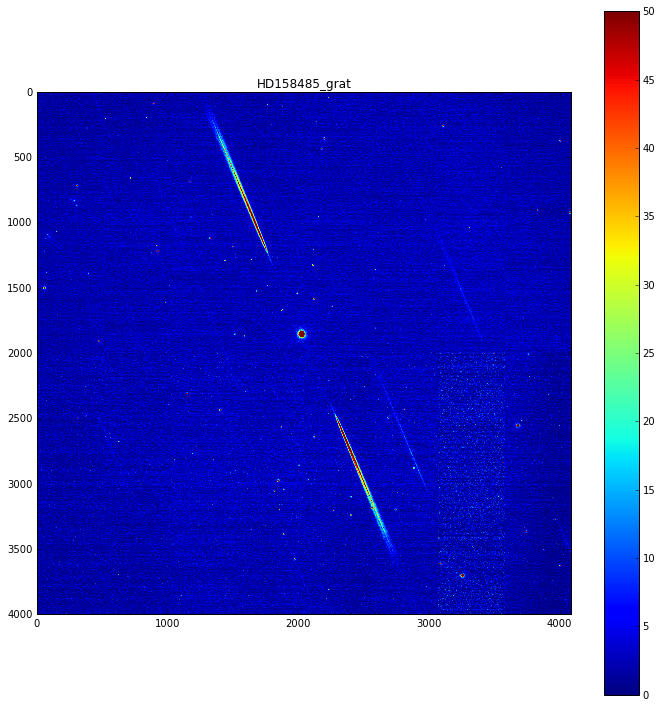

In [56]:
fig, ax = plt.subplots(figsize=(10, 10))
img=ax.imshow(ccd_chan,vmin=0,vmax=50.)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)
#plt.savefig(outputfigfilename3)

# 6) Subtract background

code implemented from photutil information there:
https://photutils.readthedocs.io/en/latest/photutils/background.html#

In [57]:
from photutils.background import Background2D
bkg = Background2D(data, (100, 100), filter_size=(3, 3),method='median')

### does the background varies over the field of view ?

In [58]:
print('median background = ',bkg.background_median)
print('median rms = ',bkg.background_rms_median)

('median background = ', 2.1917647175884056)
('median rms = ', 2.153885141133312)


### Radiography of the residual background

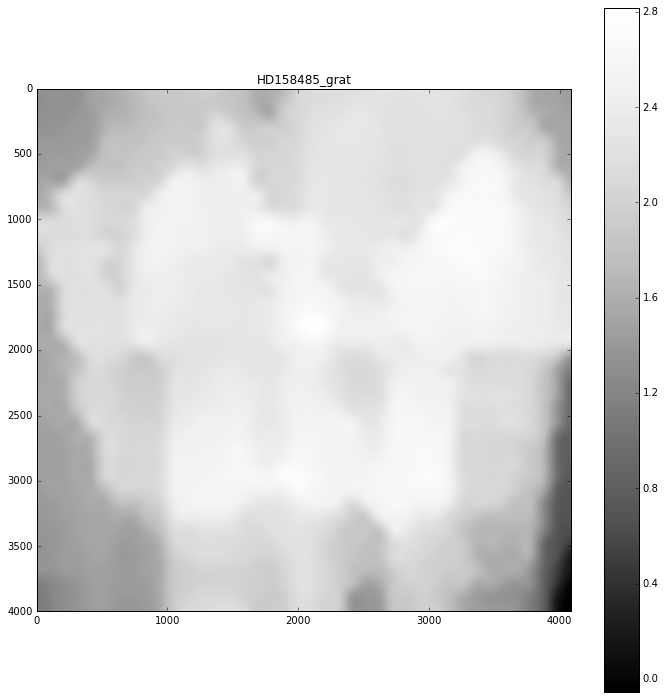

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=ax.imshow(bkg.background, cmap='Greys_r')
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

### Now subtract residual the background

In [60]:
data2=data - bkg.background

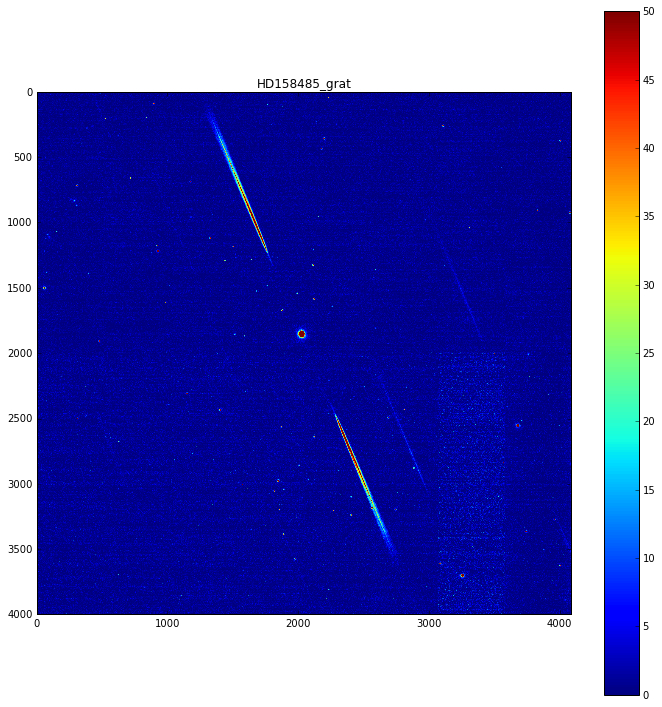

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=plt.imshow(data2, vmin=0,vmax=50.)
#img=plt.imshow(data2)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

## 8.) Compute signal and noise

In [62]:
mean, median, std = sigma_clipped_stats(data2, sigma=10.0, iters=5)    
print(mean, median, std)    

(0.034368425374147818, -0.018253132669321714, 2.5187460709856522)


In [63]:
sources = daofind(data2 - median, fwhm=3.0, threshold=50.*std)
sources.sort('flux')
print(sources)   

 id   xcentroid     ycentroid   ...      flux            mag       
--- ------------- ------------- ... ------------- -----------------
  3  4070.8281945 929.506673863 ... 1.00461178695 -0.00499567340502
  1 2195.11932771 362.701073964 ... 1.11136753796   -0.114644268218
 10  1399.4279686 2438.75409099 ... 1.19491082985   -0.193338743231
  2 307.386241476 722.527333627 ... 1.40736861369   -0.371019653548
 14 1841.87939826 2979.86744049 ... 1.44782889747   -0.401793101347
 13 1842.20893682 2979.40472966 ... 1.85371584596   -0.670107905982
  4 924.321624478 1222.55369207 ... 2.79674425011     -1.1166318847
  5 56.6611520635  1505.6087471 ... 4.60707840953    -1.65856400932
 11 3674.63351636 2556.64964773 ... 5.14984961468    -1.77948636752
 12 3673.92731827   2557.536822 ... 5.41524952019    -1.83404618137
  6 3195.26454988 1720.79663696 ...  10.249173443     -2.5267221065
 15  3250.2113799 3704.00326193 ... 16.4458773693    -3.04014261891
  8 2019.71813177 1859.49258843 ... 74.090307196

In [64]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3,4070.8281945,929.506673863,0.430373136547,0.139086563808,0.536081240645,25.0,0.0,400.075745044,1.00461178695,-0.00499567340502
1,2195.11932771,362.701073964,0.469470093057,-0.0538945238409,0.361014842975,25.0,0.0,445.965564837,1.11136753796,-0.114644268218
10,1399.4279686,2438.75409099,0.361690962654,0.087394836349,0.0137663336492,25.0,0.0,415.384313168,1.19491082985,-0.193338743231
2,307.386241476,722.527333627,0.409610215051,-0.0433906882706,-0.0560809723852,25.0,0.0,466.508204254,1.40736861369,-0.371019653548
14,1841.87939826,2979.86744049,0.394038565698,-0.471888883599,-0.578396494648,25.0,0.0,665.587750453,1.44782889747,-0.401793101347
13,1842.20893682,2979.40472966,0.446234470068,-0.666674425343,-0.646687133383,25.0,0.0,782.359314194,1.85371584596,-0.670107905982
4,924.321624478,1222.55369207,0.388163970231,0.508237661124,0.468249659763,25.0,0.0,992.046822314,2.79674425011,-1.1166318847
5,56.6611520635,1505.6087471,0.406394108535,0.235729050409,0.121632579109,25.0,0.0,1513.26269448,4.60707840953,-1.65856400932
11,3674.63351636,2556.64964773,0.394048938035,-0.271763332484,0.392515050381,25.0,0.0,2216.30885054,5.14984961468,-1.77948636752


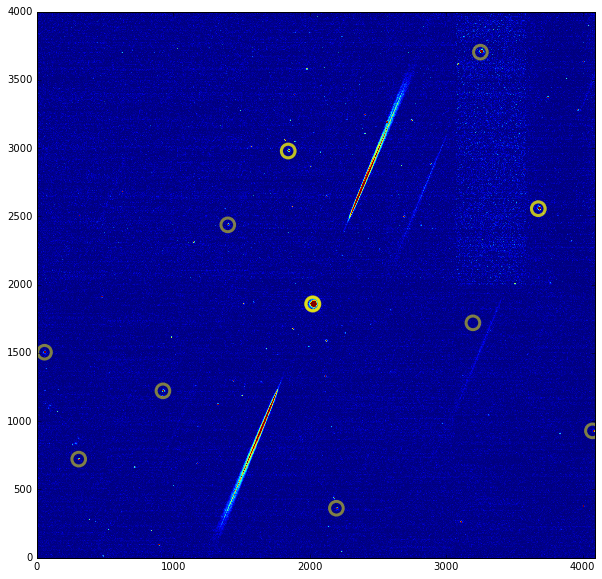

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=50.)
norm = ImageNormalize(stretch=SqrtStretch())
ax.imshow(data2,vmin=0,vmax=50.,origin='lower')
#ax.imshow(data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='yellow', lw=3., alpha=0.5)

### For example shows the 25 first stars

In [66]:
NBSTARS=25
XX=np.zeros(NBSTARS)
YY=np.zeros(NBSTARS)



selected_stars=sources.as_array()
NBFOUNDSTARS=np.min([NBSTARS,selected_stars.shape[0]])

for istar in range(NBFOUNDSTARS):
    XX[istar] = int(selected_stars[istar][1])
    YY[istar] = int(selected_stars[istar][2])   
    print XX[istar],YY[istar]

4070.0 929.0
2195.0 362.0
1399.0 2438.0
307.0 722.0
1841.0 2979.0
1842.0 2979.0
924.0 1222.0
56.0 1505.0
3674.0 2556.0
3673.0 2557.0
3195.0 1720.0
3250.0 3704.0
2019.0 1859.0
2022.0 1861.0
2023.0 1856.0


## Work with one PSF of one star

In [67]:
# Extract the plot of a PSF
index=0

onepsf=data2[YY[index]-10:YY[index]+10,XX[index]-10:XX[index]+10]
onepsfX=onepsf.sum(axis=0)
onepsfY=onepsf.sum(axis=1)

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


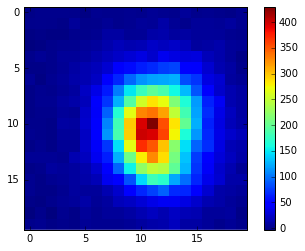

In [68]:
im=plt.imshow(onepsf,interpolation='None')
#im=plt.imshow(onepsf)
plt.colorbar(im)

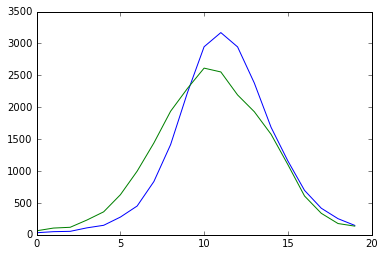

In [69]:
plt.plot(onepsfX)
plt.plot(onepsfY)

In [70]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, np.sqrt(variance))

In [71]:
DELTA_NBINSX=10
DELTA_NBINSY=10

In [72]:
weighted_avg_and_std(np.arange(onepsfX.shape[0]),onepsfX)

(11.195384909524176, 2.9508222863041724)

In [73]:
weighted_avg_and_std(np.arange(onepsfY.shape[0]),onepsfY)

(10.433146319004969, 3.3459265143189723)

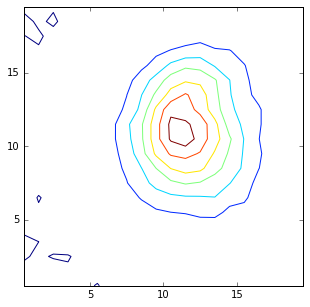

In [74]:
plt.figure(figsize=(5,5))
#onepsf2 = onepsf / np.linalg.norm(onepsf, axis=-1)[:, np.newaxis]
onepsf2 = onepsf / np.sum(onepsf)
levels=np.array([1,0.682,0.75,0.89,0.94,0.96,0.97])
#plt.contour(onepsf2,levels=levels,origin='lower') matmpltlib bug
plt.contour(onepsf2,origin='lower')

In [75]:
XV=np.arange(2*DELTA_NBINSX)-DELTA_NBINSX
YV=np.arange(2*DELTA_NBINSY)-DELTA_NBINSY
Xgrid,Ygrid=np.meshgrid(XV,YV)

In [76]:
weighted_avg_and_std(Xgrid,onepsf2)

(1.1953849095241782, 2.9508222863041724)

In [77]:
weighted_avg_and_std(Ygrid,onepsf2)

(0.43314631900496936, 3.3459265143189727)

### Estimation of PRF (PSF) for a bunch of stars


I could not use any of the utilities function.
It lacks of working examples

In [78]:
import photutils.psf 
from photutils.psf import psf_photometry

In [79]:
from astropy.modeling import models, fitting

In [80]:
import photutils
from photutils import psf

photutils.__version__

u'0.3.dev1833'

### Extraction of a few stars for visualization

In [81]:
DELTA_NBINSX=10
DELTA_NBINSY=10

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


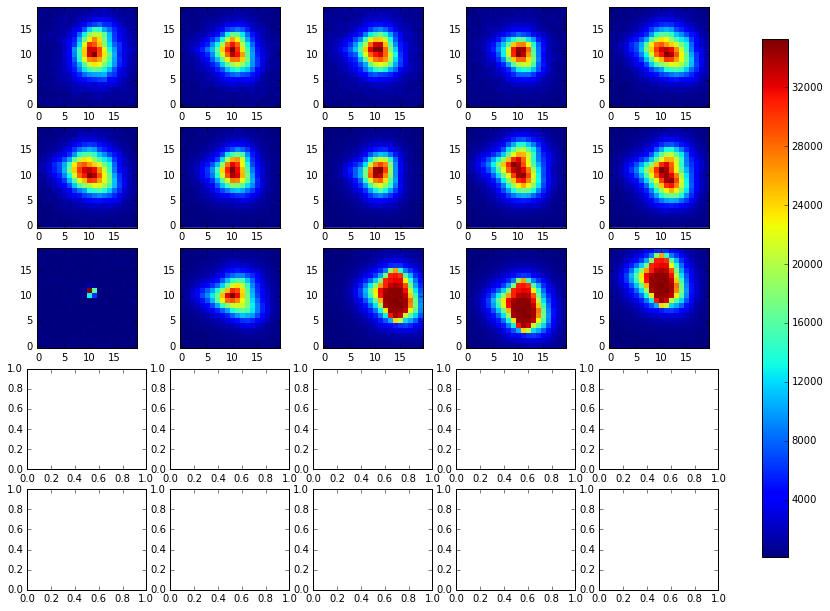

In [82]:
fig, axes = plt.subplots(nrows=5, ncols=5)
fig.set_size_inches(12, 9)
# Plot kernels
for i in range(5):
    for j in range(5):
        index=5*i+j
        if index <NBFOUNDSTARS :
            prf_image = data2[YY[index]-DELTA_NBINSY:YY[index]+DELTA_NBINSY,XX[index]-DELTA_NBINSX:XX[index]+DELTA_NBINSX]
            im = axes[i, j].imshow(prf_image, interpolation='None',origin='lower')
			
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
plt.colorbar(im, cax=cax)
plt.subplots_adjust(left=0.05, right=0.85, top=0.95, bottom=0.05)
plt.show()

In [83]:
selected_stars=sources.as_array()

NB_OF_STARS=selected_stars.shape[0]
SIGMAX_OF_STARS=np.zeros(NB_OF_STARS)
SIGMAY_OF_STARS=np.zeros(NB_OF_STARS)
for istar in range(selected_stars.shape[0]):
    XXs = int(selected_stars[istar][1])
    YYs = int(selected_stars[istar][2])   
    star_image = data2[YYs-DELTA_NBINSY:YYs+DELTA_NBINSY,XXs-DELTA_NBINSX:XXs+DELTA_NBINSX]
    thepsf = star_image / np.sum(star_image)
    SIGMAX_OF_STARS[istar]=weighted_avg_and_std(Xgrid,thepsf)[1]
    SIGMAY_OF_STARS[istar]=weighted_avg_and_std(Ygrid,thepsf)[1]

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


In [84]:
SIGMAX_OF_STARS

array([ 2.95082229,  3.08695657,  3.07597764,  2.8858677 ,  3.47124741,
        3.47654289,  3.00655004,  2.85810439,  3.30707413,  3.30695462,
               nan,  3.4217709 ,  3.10468929,  3.20718734,  3.20552786])

In [85]:
SIGMAY_OF_STARS

array([ 3.34592651,  3.02220036,  2.98565407,  2.81806888,  3.09563018,
        3.10381675,  2.95157504,  2.98784241,  3.3329123 ,  3.34833205,
               nan,  2.99917765,  3.26768926,  3.29087891,  3.21917696])

#### Cut NAN

In [86]:
all_sigx=SIGMAX_OF_STARS[np.logical_not(np.isnan(SIGMAX_OF_STARS))]
all_sigy=SIGMAY_OF_STARS[np.logical_not(np.isnan(SIGMAY_OF_STARS))]

#### Cut too low values

In [87]:
all_sigx=all_sigx[all_sigx>2.0]
all_sigy=all_sigy[all_sigy>2.0]

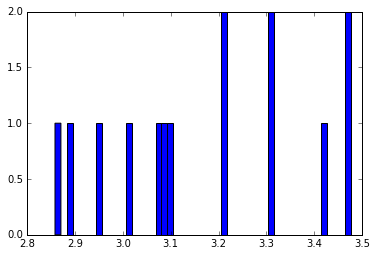

In [88]:
h1=plt.hist(all_sigx,50)

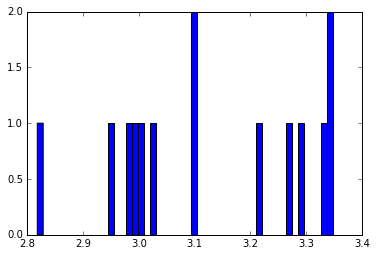

In [89]:
h1=plt.hist(all_sigy,50)

In [90]:
all_sigx.mean()

3.1689480755725348

In [91]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigx.mean(),all_sigx.std(),all_sigx.mean()*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigy.mean(),all_sigy.std(),all_sigy.mean()*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 3.17 +/- 0.20 pixels ==> psf  2.99 +/- 0.18 arcsec 
average prf(y) = 3.13 +/- 0.17 pixels ==> psf  2.95 +/- 0.15 arcsec 


In [92]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigx),all_sigx.std(),np.median(all_sigx)*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigy),all_sigy.std(),np.median(all_sigy)*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 3.16 +/- 0.20 pixels ==> psf  2.98 +/- 0.18 arcsec 
average prf(y) = 3.10 +/- 0.17 pixels ==> psf  2.93 +/- 0.15 arcsec 
